# Bibliotheke

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Einlesen

In [15]:
data = pd.read_csv('../Daten/Steuern_SO.csv', sep=';')
data

,Jahr,Personen,Steuerbares Einkommen
0,1998,148329,6551307.000
1,1999,146773,6732949.000
2,2000,145022,6588062.000
3,2001,144154,7037941.000
4,2002,145781,7156045.000
5,2003,147513,7261471.000
6,2004,148898,7328524.000
7,2005,150343,7389354.000
8,2006,151879,7619186.000
9,2007,153622,7872887.000


# Datenanalyse und -visualisierung

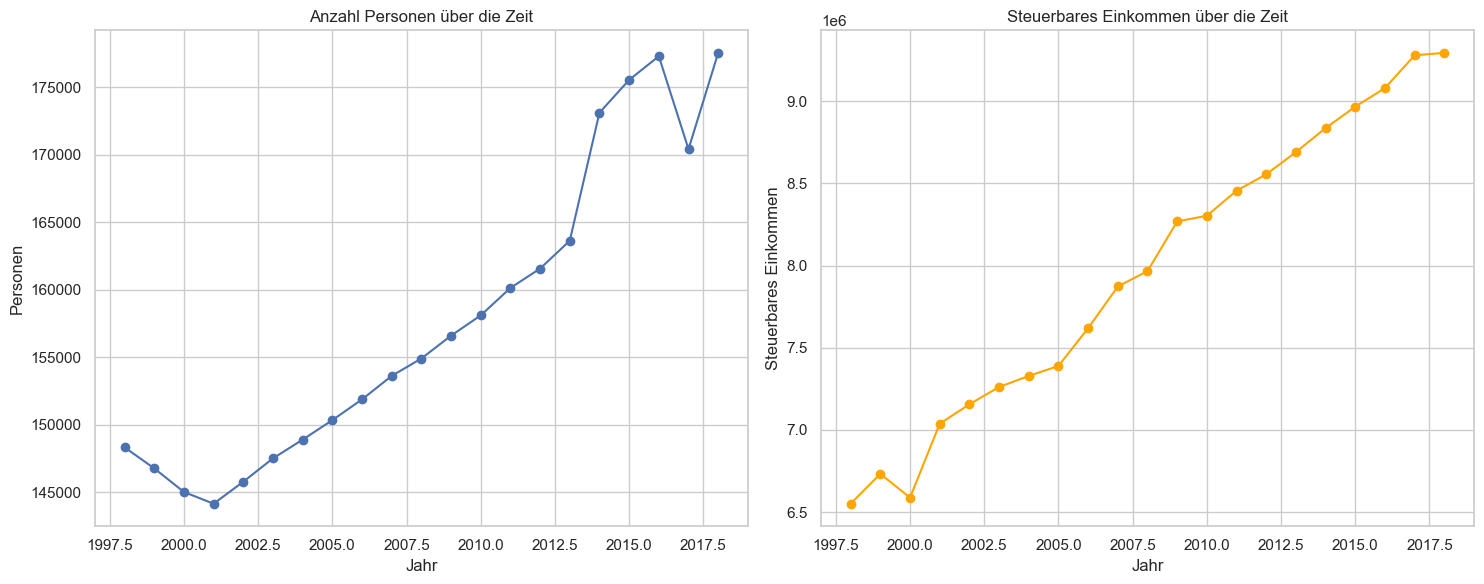

In [9]:
# Erstellung von Zeitreihendiagrammen für die Personenanzahl und das steuerbare Einkommen
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(data['Jahr'], data['Personen'], marker='o')
plt.title('Anzahl Personen über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Personen')

plt.subplot(1, 2, 2)
plt.plot(data['Jahr'], data['Steuerbares Einkommen'], marker='o', color='orange')
plt.title('Steuerbares Einkommen über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Steuerbares Einkommen')

plt.tight_layout()
plt.show()


# Zeitreihenkomponenten

## Steuerbares Einkommen

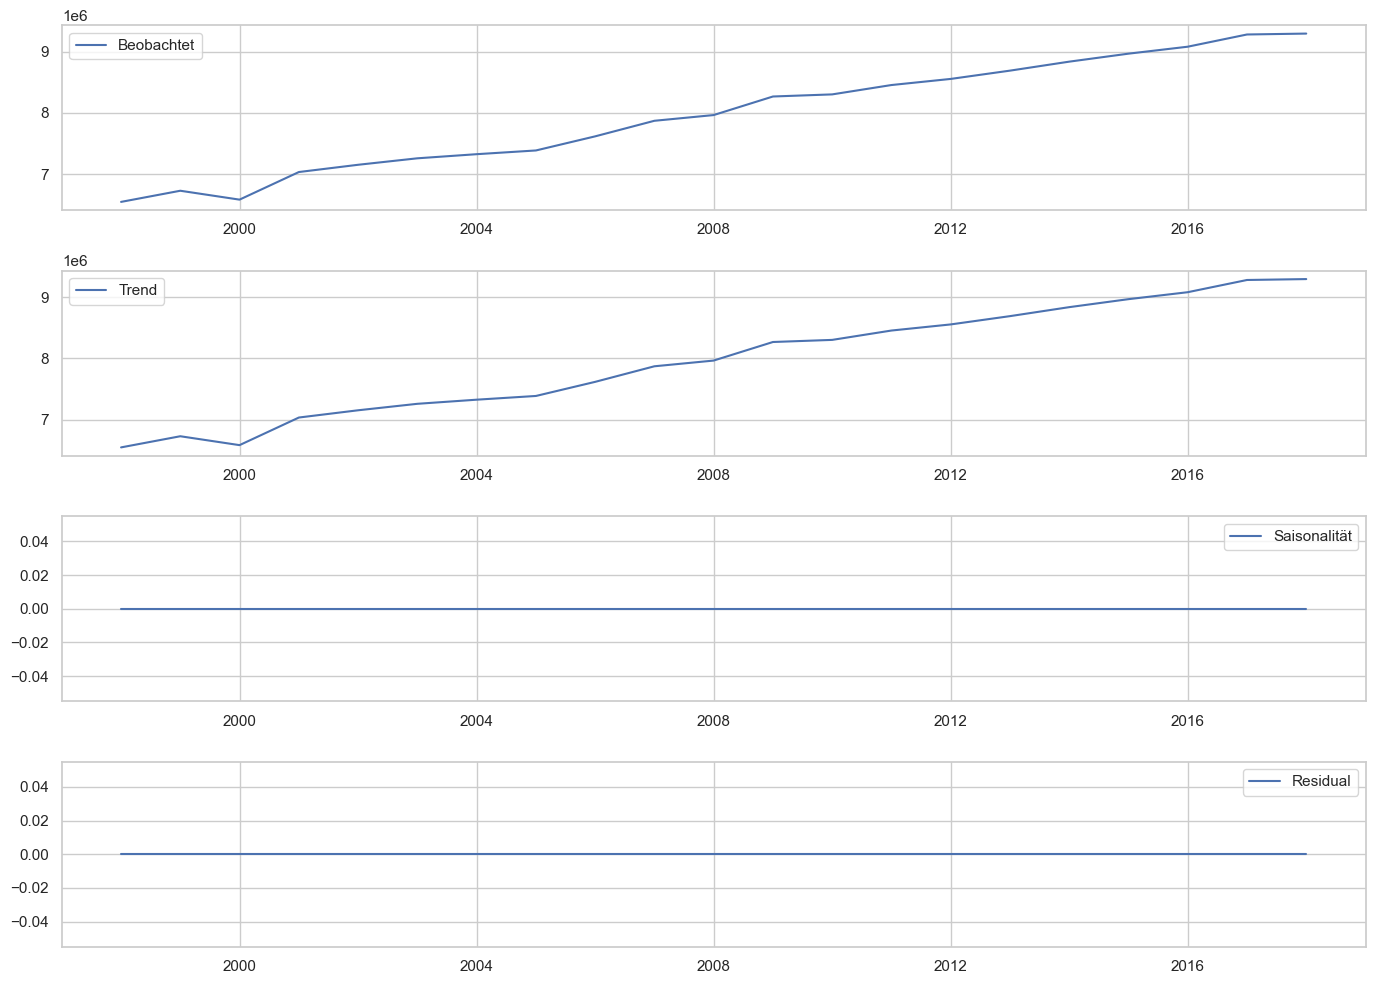

In [16]:


# Zerlegung der Zeitreihe für das steuerbare Einkommen
# Da wir keine spezifische Saisonalität kennen, wählen wir ein einfaches Modell (additiv)
# und lassen statsmodels die Frequenz bestimmen

# Umwandlung der 'Jahr'-Spalte in ein DateTime-Format für die Zeitreihenanalyse
data['Jahr'] = pd.to_datetime(data['Jahr'], format='%Y')

# Setzen der 'Jahr'-Spalte als Index
tax_data_indexed = data.set_index('Jahr')

# Saisonale Zerlegung des steuerbaren Einkommens
decomposition_income = seasonal_decompose(tax_data_indexed['Steuerbares Einkommen'], model='additive')

# Plotting the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition_income.observed, label='Beobachtet')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition_income.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition_income.seasonal,label='Saisonalität')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition_income.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


## Bevölkerungsgrösse

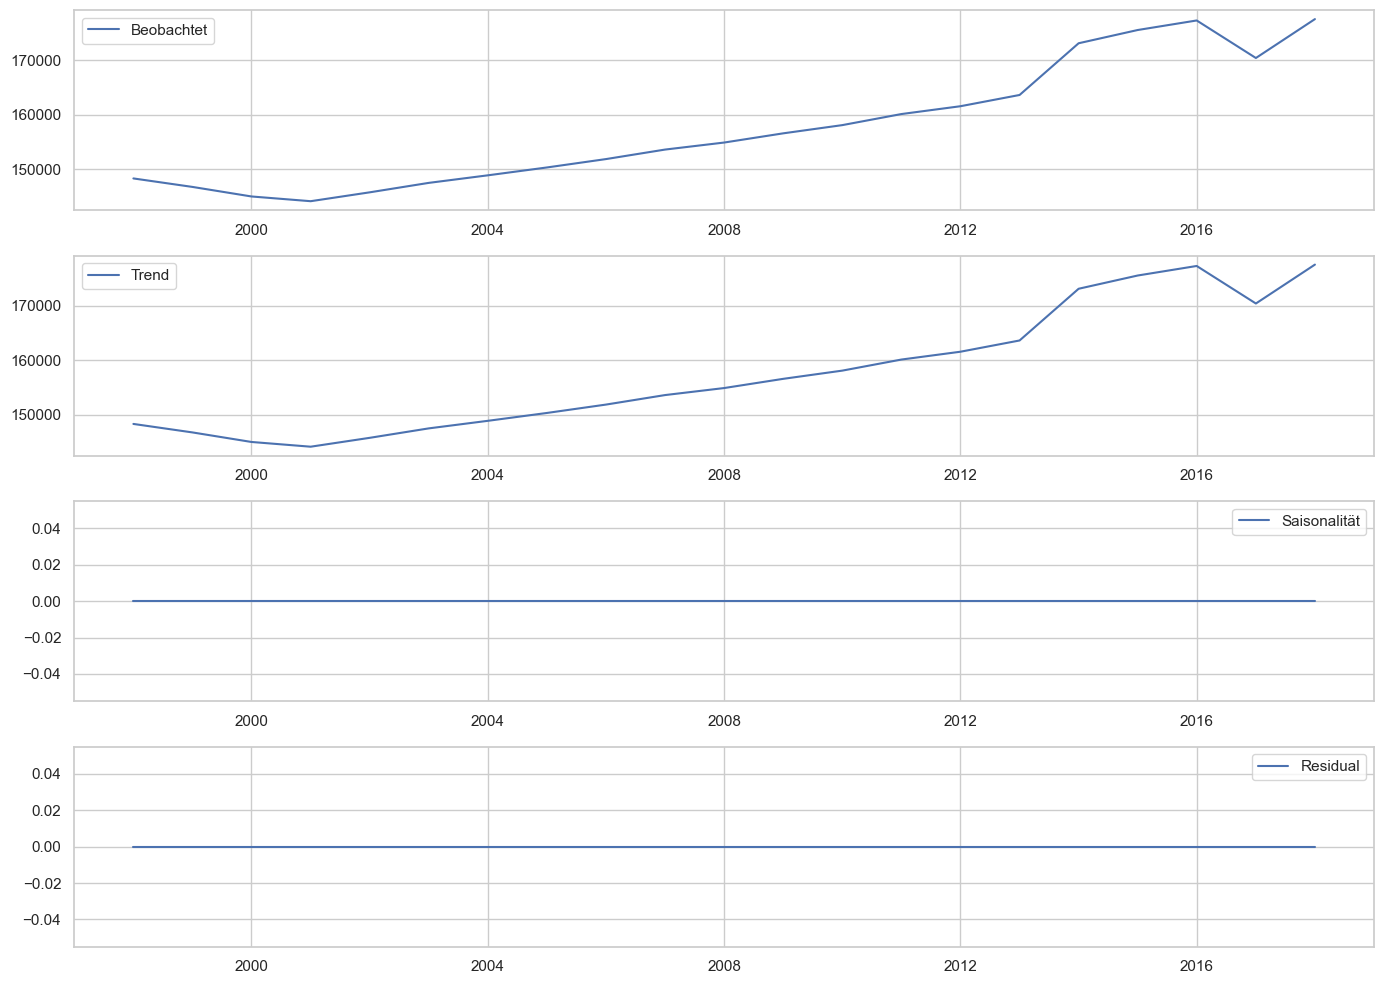

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Saisonale Zerlegung des steuerbaren Einkommens
decomposition_income = seasonal_decompose(tax_data_indexed['Personen'], model='additive')

# Plotting the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition_income.observed, label='Beobachtet')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition_income.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition_income.seasonal,label='Saisonalität')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition_income.resid, label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()



# Test auf Stationarität

In [20]:
# Funktion zur Durchführung und Anzeige der Ergebnisse des Augmented Dickey-Fuller Tests
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistik: {}'.format(result[0]))
    print('p-Wert: {}'.format(result[1]))
    print('Kritische Werte:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))

# ADF-Test für das steuerbare Einkommen
print("ADF-Test für das steuerbare Einkommen:")
perform_adf_test(tax_data_indexed['Steuerbares Einkommen'])

# ADF-Test für die Bevölkerungsgröße
print("\nADF-Test für die Bevölkerungsgröße:")
perform_adf_test(tax_data_indexed['Personen'])


ADF-Test für das steuerbare Einkommen:
ADF Statistik: -4.0036523390816665
p-Wert: 0.0013915068209981076
Kritische Werte:
	1%: -4.138
	5%: -3.155
	10%: -2.714

ADF-Test für die Bevölkerungsgröße:
ADF Statistik: 1.482978779385819
p-Wert: 0.9974603435576748
Kritische Werte:
	1%: -4.138
	5%: -3.155
	10%: -2.714


## Interpretation

Interpretation 
- Für das steuerbare Einkommen ist die ADF-Statistik kleiner als die kritischen Werte, und der p-Wert ist signifikant (kleiner als 0,05). Dies deutet darauf hin, dass die Zeitreihe stationär ist.
- Für die Bevölkerungsgröße ist die ADF-Statistik größer als die kritischen Werte, und der p-Wert ist nicht signifikant (größer als 0,05). Dies deutet darauf hin, dass die Zeitreihe nicht stationär ist.

## Differenzierung der Personen

ADF-Test für die differenzierte Bevölkerungsgröße:
ADF Statistik: -1.363827301321796
p-Wert: 0.5994897315157037
Kritische Werte:
	1%: -4.223
	5%: -3.189
	10%: -2.730


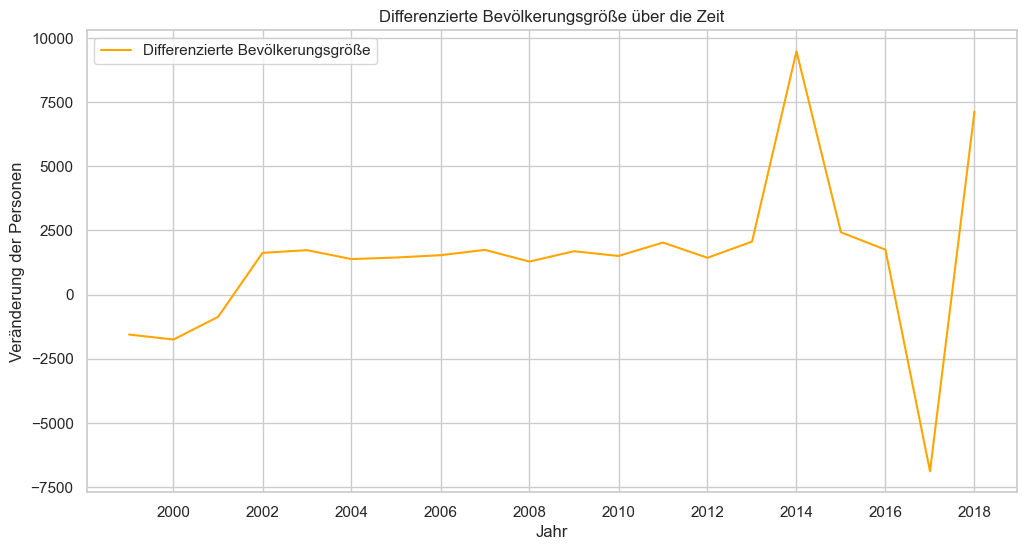

In [21]:
# Differenzierung der Zeitreihe für die Bevölkerungsgröße
population_diff = tax_data_indexed['Personen'].diff().dropna()

# ADF-Test für die differenzierte Bevölkerungsgröße
print("ADF-Test für die differenzierte Bevölkerungsgröße:")
perform_adf_test(population_diff)

# Plotting the differenzierte Bevölkerungsgröße
plt.figure(figsize=(12, 6))
plt.plot(population_diff, label='Differenzierte Bevölkerungsgröße', color='orange')
plt.title('Differenzierte Bevölkerungsgröße über die Zeit')
plt.xlabel('Jahr')
plt.ylabel('Veränderung der Personen')
plt.legend()
plt.grid(True)
plt.show()


Interpretation
- Die differenzierte Zeitreihe der Bevölkerungsgröße ist immer noch nicht stationär, da die ADF-Statistik größer als die kritischen Werte ist und der p-Wert nicht signifikant (größer als 0,05) ist.

# Modelieren des Steuerbaren Einkommens

## Arima

## ACF und PACF

C:\Users\David Dedic\AppData\Roaming\Python\Python39\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


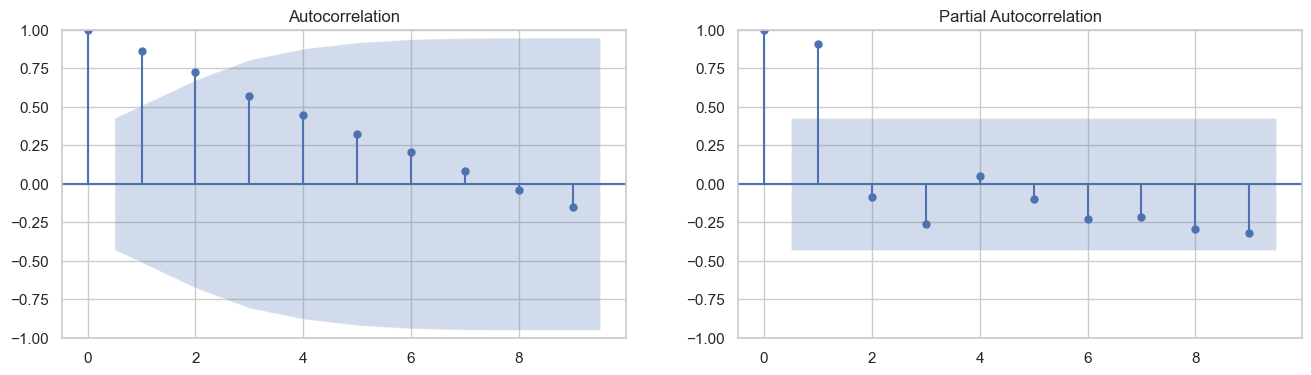

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Reduzierung der Anzahl der Lags für ACF und PACF
lags = min(10, len(tax_data_indexed['Steuerbares Einkommen'])//2 - 1)

# Neuzeichnen der ACF- und PACF-Diagramme mit reduzierter Lag-Anzahl
fig, axes = plt.subplots(1, 2, figsize=(16, 4))

# Autokorrelationsfunktion (ACF)
plot_acf(tax_data_indexed['Steuerbares Einkommen'], ax=axes[0], lags=lags)

# Partielle Autokorrelationsfunktion (PACF)
plot_pacf(tax_data_indexed['Steuerbares Einkommen'], ax=axes[1], lags=lags)

plt.show()


#### Schlussfolgerung

Schlussfolgerungen für das ARIMA-Modell
- p (AR-Teil): Basierend auf dem PACF könnten wir annehmen, dass 1 oder 2 AR-Terme angemessen sind (erhebliche Korrelation beim ersten Lag).
- d (Integrationsordnung): Da die Zeitreihe bereits stationär ist, könnte d = 0 oder d = 1 (falls wir vorsichtig sein wollen) sein.
- q (MA-Teil): Der ACF zeigt eine allmähliche Abnahme, was darauf hindeutet, dass möglicherweise mehrere MA-Terme erforderlich sind. Jedoch sollte dies in Kombination mit dem AR-Teil ausgewogen sein.

## Weiterer Test

Zuerst beginnen wir mit dem ARIMA-Modell. Wir müssen die optimalen Parameter für das ARIMA-Modell bestimmen. Dazu gehören die Ordnungen der autoregressiven (AR), differenzierten (I) und gleitenden Durchschnitts (MA) Komponenten. Wir verwenden das Akaike-Informationskriterium (AIC) als Maßstab, um das beste Modell auszuwählen.

In [24]:
from statsmodels.tsa.arima.model import ARIMA
import itertools
import warnings

# Ignoring convergence warnings for model fitting
warnings.filterwarnings("ignore")

# Definieren der Parameterbereiche für p, d und q
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

# Suchen nach dem besten ARIMA-Modell
best_aic = float("inf")
best_pdq = None
best_model = None

for param in pdq:
    try:
        model = ARIMA(tax_data_indexed['Steuerbares Einkommen'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
            best_model = results
    except:
        continue

best_aic, best_pdq, best_model.summary()


(506.4923730843525,
 (2, 2, 1),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                  SARIMAX Results                                 
 Dep. Variable:     Steuerbares Einkommen   No. Observations:                   21
 Model:                    ARIMA(2, 2, 1)   Log Likelihood                -249.246
 Date:                   Wed, 15 Nov 2023   AIC                            506.492
 Time:                           10:31:39   BIC                            510.270
 Sample:                       01-01-1998   HQIC                           507.132
                             - 01-01-2018                                         
 Covariance Type:                     opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 ar.L1         -0.4482      0.156     -2.881      0.004      -0.753      -0.143
 ar.L2        

## Exponentielle Glättung

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Modellieren mit Holt-Winters exponentieller Glättung
# Wir verwenden nur den Trendkomponenten, da keine starke Saisonalität festgestellt wurde
model_hw = ExponentialSmoothing(tax_data_indexed['Steuerbares Einkommen'], trend='add', seasonal=None)
hw_results = model_hw.fit()

# Anzeigen der Modellzusammenfassung
hw_results.summary()


Dep. Variable:,Steuerbares Einkommen,No. Observations:,21
Model:,ExponentialSmoothing,SSE,165416968333.104
Optimized:,True,AIC,486.531
Trend:,Additive,BIC,490.710
Seasonal:,None,AICC,492.531
Seasonal Periods:,None,Date:,"Wed, 15 Nov 2023"
Box-Cox:,False,Time:,10:32:30
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1228571,alpha,True
smoothing_trend,0.0001,beta,True


# Prognose

## Arima

In [37]:
hw_forecast_df

,Exponentielle Glättung Prognose
2019-12-31,NaN
2020-12-31,NaN
2021-12-31,NaN
2022-12-31,NaN
2023-12-31,NaN
2024-12-31,NaN
2025-12-31,NaN
2026-12-31,NaN
2027-12-31,NaN
2028-12-31,NaN


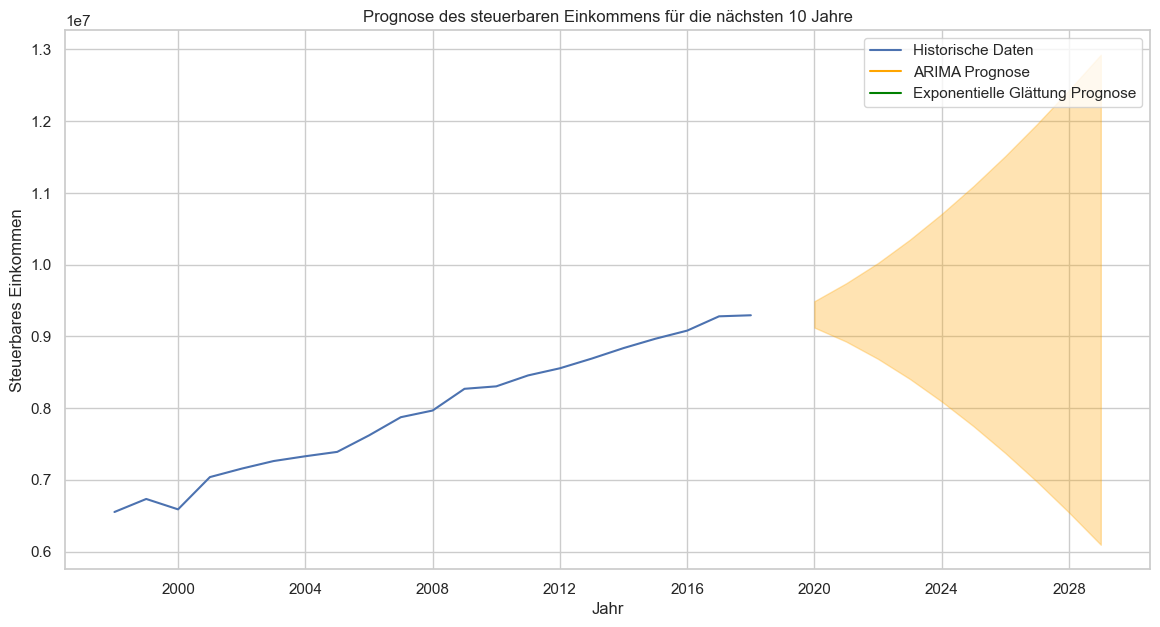

In [26]:
# Erstellung der Prognosen für die nächsten 10 Jahre mit dem ARIMA-Modell
arima_forecast = best_model.get_forecast(steps=10)
arima_forecast_conf_int = arima_forecast.conf_int()

# Prognosen mit dem Modell der exponentiellen Glättung
hw_forecast = hw_results.forecast(steps=10)

# Erstellung eines Datumsbereichs für die Prognosejahre
forecast_years = pd.date_range(start=tax_data_indexed.index[-1], periods=11, freq='Y')[1:]

# Umwandlung der Prognosen in DataFrames
arima_forecast_df = pd.DataFrame(arima_forecast.predicted_mean, index=forecast_years)
arima_forecast_df.columns = ['ARIMA Prognose']
hw_forecast_df = pd.DataFrame(hw_forecast, index=forecast_years)
hw_forecast_df.columns = ['Exponentielle Glättung Prognose']

# Zusammenführen der Prognosen für eine vergleichende Darstellung
combined_forecasts = pd.concat([arima_forecast_df, hw_forecast_df], axis=1)

# Visualisierung der Prognosen
plt.figure(figsize=(14, 7))
plt.plot(tax_data_indexed['Steuerbares Einkommen'], label='Historische Daten')
plt.plot(arima_forecast_df, label='ARIMA Prognose', color='orange')
plt.plot(hw_forecast_df, label='Exponentielle Glättung Prognose', color='green')
plt.fill_between(arima_forecast_df.index, arima_forecast_conf_int.iloc[:, 0], arima_forecast_conf_int.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Prognose des steuerbaren Einkommens für die nächsten 10 Jahre')
plt.xlabel('Jahr')
plt.ylabel('Steuerbares Einkommen')
plt.legend()
plt.show()
